In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import re

In [21]:
comments_msk = pd.read_csv('data_msk.csv', sep=',', decimal=",")
comments_msk = comments_msk.drop(columns = ['commentsLink', ' index'], axis=1)

comments_spb = pd.read_csv('data_spb.csv', sep=',', decimal=",")
comments_spb = comments_spb.drop(columns = ['commentsLink', ' index'], axis=1)

comments_ekt = pd.read_csv('data_ekt.csv', sep=',', decimal=",")
comments_ekt = comments_ekt.drop(columns = ['commentsLink', ' index'], axis=1)

comments_ksdr = pd.read_csv('data_ksdr.csv', sep=',', decimal=",")
comments_ksdr = comments_ksdr.drop(columns = ['commentsLink', ' index'], axis=1)

comments_kzn = pd.read_csv('data_kzn.csv', sep=',', decimal=",")
comments_kzn = comments_kzn.drop(columns = ['commentsLink', ' index'], axis=1)

comments_nnov = pd.read_csv('data_nnov.csv', sep=',', decimal=",")
comments_nnov = comments_nnov.drop(columns = ['commentsLink', ' index'], axis=1)

comments_rnd = pd.read_csv('data_rnd.csv', sep=',', decimal=",")
comments_rnd = comments_rnd.drop(columns = ['commentsLink', ' index'], axis=1)

In [22]:
comments = pd.concat([
    comments_msk,
    comments_spb,
    comments_ekt,
    comments_ksdr,
    comments_kzn,
    comments_nnov,
    comments_rnd
    ], axis=0)
comments

,comment,mark
0,Преподаватель находит индивидуальный подход п...,Оценка: 5+.
1,Плюсы: Анна Валерьевна обязательна компетентн...,Оценка: 5.
2,СПАСИБО Анна Валерьевна! Сдали хорошо ЕГЭ. С ...,Оценка: 5.
3,50 % успеха - наличие контакта с преподавател...,Оценка: 5+.
4,Анна Валерьевна является не только уникальным...,Оценка: 5+.
...,...,...
7223,С Марией Николаевной мы занимаемся не так час...,Оценка: 5.
7224,Хорошо. Она хорошо преподает. Понятно доступ...,Оценка: 5.
7225,В принципе все положительно. Замечательный п...,Оценка: 5.
7226,Мы занимаемся до сих пор. Впечатления положит...,Оценка: 5.


In [23]:
comments = comments.reset_index(drop=True)

In [24]:
comments.rename(columns = {' comment' : 'comment', ' mark' : 'mark'}, inplace = True )

In [25]:
np.unique(comments['mark'])

array([' Оценка: 1.', ' Оценка: 2.', ' Оценка: 3+.', ' Оценка: 3.',
       ' Оценка: 3−.', ' Оценка: 4+.', ' Оценка: 4.', ' Оценка: 4−.',
       ' Оценка: 5+.', ' Оценка: 5.', ' Оценка: 5−.'], dtype=object)

In [26]:
comments.groupby('mark').nunique()

,comment
mark,
Оценка: 1.,180
Оценка: 2.,601
Оценка: 3+.,152
Оценка: 3.,969
Оценка: 3−.,182
Оценка: 4+.,1446
Оценка: 4.,3195
Оценка: 4−.,441
Оценка: 5+.,56243


In [27]:
comments.loc[(comments['mark'] == ' Оценка: 5.'), 'mark'] = 5
comments.loc[(comments['mark'] == ' Оценка: 5+.'), 'mark'] = 5

comments.loc[(comments['mark'] == ' Оценка: 5−.'), 'mark'] = 4
comments.loc[(comments['mark'] == ' Оценка: 4.'), 'mark'] = 4
comments.loc[(comments['mark'] == ' Оценка: 4+.'), 'mark'] = 4

comments.loc[(comments['mark'] == ' Оценка: 4−.'), 'mark'] = 3
comments.loc[(comments['mark'] == ' Оценка: 3.'), 'mark'] = 3
comments.loc[(comments['mark'] == ' Оценка: 3+.'), 'mark'] = 3

comments.loc[(comments['mark'] == ' Оценка: 3−.'), 'mark'] = 2
comments.loc[(comments['mark'] == ' Оценка: 2.'), 'mark'] = 2
comments.loc[(comments['mark'] == ' Оценка: 1.'), 'mark'] = 2

In [31]:
comments = comments.sort_values(by = ['mark'])[:-110000]

In [32]:
comments.groupby('mark').nunique()

,comment
mark,
2,963
3,1562
4,5976
5,14080


In [33]:
from sklearn.utils import shuffle
comments = shuffle(comments)
comments

,comment,mark
57040,Хороший репетитор. Рекомендуем.,4
94938,Сама была на первом занятии с преподавателем ...,5
67872,У Маргариты Викторовны отличные знания англий...,4
131680,Анастасия Владимировна подошла профессиональн...,4
92973,У ребенка настолько хорошие результаты пошли...,5
...,...,...
72940,Анастасия Сергеевна очень хороший репетитор и...,5
98138,Плюсы: Александр Геннадьевич очень доброжелат...,5
132005,Мы занимаемся три месяца. Работа продолжается...,4
89068,Мои занятия с репетитором по физике продолжаю...,5


<AxesSubplot: xlabel='mark', ylabel='count'>

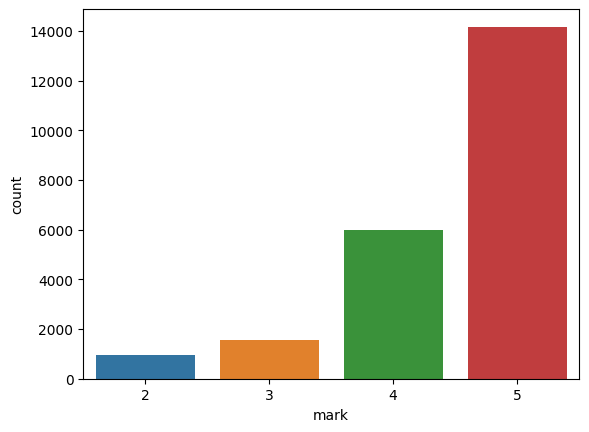

In [34]:
sns.countplot(x = comments['mark'],data = comments)

<AxesSubplot: ylabel='Count'>

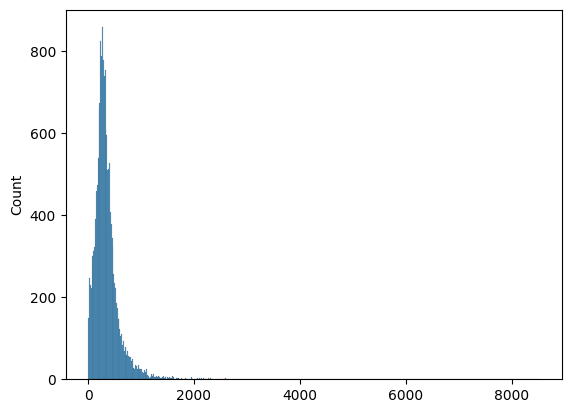

In [56]:
sns.histplot([len(comment) for comment in comments['comment']])

In [57]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_ru = stopwords.words("russian")
stopwords_ru.remove('не')
stopwords_ru.remove('нет')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/natalaantonenko/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
from pymorphy2 import MorphAnalyzer

patterns = "[A-Za-z!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
morph = MorphAnalyzer()

def preprocessing(doc):
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        if token:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            if token not in stopwords_ru:
                tokens.append(token)
    if len(tokens) > 7:
        return tokens
    return None

In [61]:
comments.iloc[:,0]

3849      Было проведено три занятия. Преподаватель обр...
45301     Марина Александровна понравилась моему ребёнк...
61537     Виктор Борисович - просто умница и как челове...
45206     У меня положительный отзыв о Екатерине Сергее...
60560     Отличный репетитор! Благодаря Сергею Валерьев...
                               ...                        
74077     Очень нравится репетитор.Всегда доброжелатель...
72702     Лилия Ансафовна – умная внимательна ответстве...
49007     Мы остались очень довольны сотрудничеством с ...
59018     Меня полностью устроили занятия с преподавате...
63387     Занимаюсь с Татьяной Николаевной испанским бо...
Name: comment, Length: 17410, dtype: object

In [62]:
data = comments.iloc[:,0].apply(preprocessing)
comments['comm_tokens'] = data
comments

3849     [провести, занятие, преподаватель, обращаться,...
45301    [марина, александрович, понравиться, ребёнок, ...
61537    [виктор, борисович, просто, умница, человек, п...
45206    [положительный, отзыв, екатерина, сергеевич, ч...
60560    [отличный, репетитор, благодаря, сергей, валер...
                               ...                        
74077    [очень, нравиться, репетитор, доброжелательнав...
72702    [лилия, ансафович, –, умный, внимательный, отв...
49007    [остаться, очень, довольный, сотрудничество, о...
59018    [полностью, устроить, занятие, преподаватель, ...
63387    [заниматься, татьяна, николаевич, испанский, п...
Name: comment, Length: 17410, dtype: object

In [66]:
comments = comments.dropna()
len(comments)

16449

In [68]:
from collections import defaultdict

word_freq = defaultdict(int)
for tokens in comments['comm_tokens'].iloc[:]:
    for token in tokens:
        word_freq[token] += 1

sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['не',
 'очень',
 'занятие',
 'репетитор',
 'заниматься',
 'ребёнок',
 'преподаватель',
 'всё',
 'педагог',
 'язык']

In [69]:
comments

,comment,mark,comm_tokens
3849,Было проведено три занятия. Преподаватель обр...,3,"[провести, занятие, преподаватель, обращаться,..."
45301,Марина Александровна понравилась моему ребёнк...,5,"[марина, александрович, понравиться, ребёнок, ..."
61537,Виктор Борисович - просто умница и как челове...,5,"[виктор, борисович, просто, умница, человек, п..."
45206,У меня положительный отзыв о Екатерине Сергее...,5,"[положительный, отзыв, екатерина, сергеевич, ч..."
60560,Отличный репетитор! Благодаря Сергею Валерьев...,5,"[отличный, репетитор, благодаря, сергей, валер..."
...,...,...,...
74077,Очень нравится репетитор.Всегда доброжелатель...,4,"[очень, нравиться, репетитор, доброжелательнав..."
72702,Лилия Ансафовна – умная внимательна ответстве...,4,"[лилия, ансафович, –, умный, внимательный, отв..."
49007,Мы остались очень довольны сотрудничеством с ...,5,"[остаться, очень, довольный, сотрудничество, о..."
59018,Меня полностью устроили занятия с преподавате...,5,"[полностью, устроить, занятие, преподаватель, ..."


In [ ]:
comments.groupby('mark').nunique()

In [82]:
comments['mark'] = comments['mark'].astype(str).astype(int)
comments['comment'] = comments['comment'].astype(str)

In [85]:
X = comments['comment']
y = comments['mark']

In [86]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 1234)  

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

%matplotlib inline
import matplotlib.pyplot as plt

v = TfidfVectorizer(norm=None, max_df=0.8, max_features=500, decode_error='replace') # Взвешиваем вектора
X_train_vector = v.fit_transform(X_train)
X_test_vector = v.transform(X_test)

clf = LogisticRegression( random_state=64, solver='lbfgs', max_iter=10000, n_jobs=-1) # Обучаем классификатор
clf.fit(X_train_vector, y_train)
y_pred = clf.predict(X_test_vector)

In [88]:
accuracy_score(y_test, y_pred)

0.7546509486093204

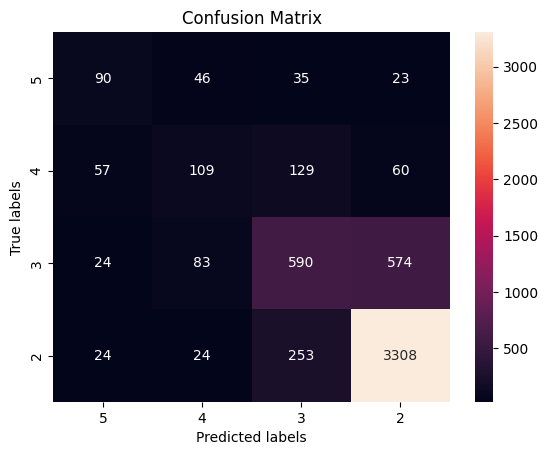

In [93]:
ax= plt.subplot()

cmm = confusion_matrix(y_test,y_pred)
sns.heatmap(cmm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['5','4','3','2']); ax.yaxis.set_ticklabels(['5','4','3','2']);

In [ ]:
print(u'Таблица сопряженности для обучающей выборки')
conf_mat = confusion_matrix(y_train, y_pred_train)

conf_mat_train = pd.DataFrame(conf_mat, index=classifier.classes_, columns=classifier.classes_)
conf_mat_train